$\text{Nome: Rafael Gonçalves  -  RA: 186062}$

# Parte I - Atividades teóricas

## Exercício 1

a) $P(A^C) = 1 - P(A) = 1 - \frac{1}{3} = \frac{2}{3}$

b) $P(A^C \cup B) = P(A^C) + P(B) - P(A^CB) = P(A^C) + P(B) - (P(B) - P(AB)) = P(A^C) + P(AB) = \frac{2}{3} + \frac{1}{6} = \frac{5}{6}$

c) $P(A \cup B^C) = P(A) + P(B^C) - P(AB^C) = P(B^C) + P(AB) = (1 - P(B)) + P(AB) = (1 - \frac{1}{4}) + \frac{1}{6} = \frac{5}{12}$

d) $P(AB^C) = P(A) + P(B^C) - P(A \cup B^C) = \frac{1}{3} + \frac{3}{4} - \frac{5}{12} = \frac{8}{12}$

e) $P(A^C \cup B^C) = P(A^C) + P(B^C) - P(A^CB^C) = \frac{2}{3} + \frac{3}{4} - \frac{5}{6} = \frac{7}{12}$

## Exercício 2

a) $$
    F_X(x) = P(X \leq x) = \int\limits_{-\infty}^x f_X(\xi) d\xi = \int\limits_{-\infty}^x \frac{1}{2} d\xi = \left[ \frac{1}{2}\xi \right]^x_0 = \frac{1}{2} x, \forall X \in [0, 2]
$$

b)

$E\{X\} = \int\limits_{-\infty}^{\infty} xf_X(x)dx = \int\limits_0^2 \frac{1}{2}x dx = \left[\frac{x^2}{4}\right]^2_0 = 1$

$E\{X^2\} = \int\limits_{-\infty}^{\infty} x^2f_X(x)dx = \int\limits_0^2 \frac{1}{2}x^2 dx = \left[\frac{x^3}{6}\right]^2_0 = \frac{4}{3}$

$E\{X^3\} = \int\limits_{-\infty}^{\infty} x^3f_X(x)dx = \int\limits_0^2 \frac{1}{2}x^3 dx = \left[\frac{x^4}{8}\right]^2_0 = 2$

## Exercício 3

a) $X_2$, pois quanto mais próximo da distribuição uniforme, mais difícil é acertar o resultado de um evento aleatório "chutando um valor", ou seja, a variável aleatória $X_2$ carrega mais informação que a variável aleatória $X_1$, pois neste último eu poderia supor que o resultado será sempre 3 com uma taxa de acertos de 40% contra uma taxa de acertos de 25% para qualquer valor estimado para $X_2$ se não tivermos nenhuma informação _a priori_.

b)

$H(X_1) = - \sum\limits_x p(X_1)log_2[p(X_1)] = -[0,1(-3,32) + 0,2(-2,32) + 0,3(-1,74) + 0,4(-1,32)] = 1,85$

$H(X_2) = - \sum\limits_x p(X_2)log_2[p(X_2)] = - [0,25 (-2) + 0,25 (-2) + 0,25 (-2) + 0,25(-2)] = 2$

c)

$D(P_1 || P_2) = \sum\limits_x p(X_1)log_2\left[\frac{p(X_1)}{p(X_2)}\right] = 0,1(-1,32) + 0,2(-0,32) + 0,3(-0,26) + 0,4(-0,68) = -0,54$

$D(P_2 || P_1) = \sum\limits_x p(X_2)log_2\left[\frac{p(X_2)}{p(X_1)}\right] = 0,25(1.32 +  0.32 - 0.26 -0.68) = 0,18$

## Exercício 4

a) $\mu_{ML} = arg max_\theta p(x|\mu) = arg max_\theta log[p(x|\mu)] = arg max_\theta \frac{p(x\mu)}{p(\mu)} = x$

b) $\mu_{ML} = arg max_\theta p(\mathbf{x}|\mu) = arg ax_\theta log[p(\mathbf{x}|\mu)] = arg max_\theta \sum\limits_{k=1}^{N} log[p(x_K|\mu)] =  arg max_\theta \sum\limits_{k=1}^{N} log\left[\frac{p(x_K\mu)}{p(\mu)}\right] $

c) 

# Parte II - Atividade computacional

### Importa bibliotecas

In [1]:
import os
import urllib.request
import random
random.seed = 42
import numpy as np
np.random.seed = 42
import matplotlib.pyplot as plt
%matplotlib inline

### Download dataset

In [2]:
data_url = 'http://www.dca.fee.unicamp.br/~lboccato/sunspot.txt'
data_dir = os.path.abspath(os.path.relpath('../data'))
data_path = os.path.join(data_dir, 'sunspot.txt')

urllib.request.urlretrieve(data_url, data_path)

('/home/rafael/inbox/machine-learning/data/sunspot.txt',
 <http.client.HTTPMessage at 0x7fc1b68aef60>)

In [3]:
%%bash
head ../data/sunspot.txt

 1749   58.0  62.6  70.0  55.7  85.0  83.5  94.8  66.3  75.9  75.5 158.6  85.2
 1750   73.3  75.9  89.2  88.3  90.0 100.0  85.4 103.0  91.2  65.7  63.3  75.4
 1751   70.0  43.5  45.3  56.4  60.7  50.7  66.3  59.8  23.5  23.2  28.5  44.0
 1752   35.0  50.0  71.0  59.3  59.7  39.6  78.4  29.3  27.1  46.6  37.6  40.0
 1753   44.0  32.0  45.7  38.0  36.0  31.7  22.0  39.0  28.0  25.0  20.0   6.7
 1754    0.0   3.0   1.7  13.7  20.7  26.7  18.8  12.3   8.2  24.1  13.2   4.2
 1755   10.2  11.2   6.8   6.5   0.0   0.0   8.6   3.2  17.8  23.7   6.8  20.0
 1756   12.5   7.1   5.4   9.4  12.5  12.9   3.6   6.4  11.8  14.3  17.0   9.4
 1757   14.1  21.2  26.2  30.0  38.1  12.8  25.0  51.3  39.7  32.5  64.7  33.5
 1758   37.6  52.0  49.0  72.3  46.4  45.0  44.0  38.7  62.5  37.7  43.0  43.0


### Importa dataset

In [4]:
dataset = np.loadtxt(data_path, usecols=range(1,13))

In [5]:
dataset.shape

(266, 12)

### Cria conjunto de teste e conjunto de treino

In [6]:
K = 20 # temporal window size
N = np.size(dataset) # number of samples
M = N-K # number of samples of new dataset
X = np.empty((M,K))
y = np.empty((M,1))

for i in range(M):
    for k in range(K):
        X[i][k] = dataset.flatten()[(i+K) - (k + 1)]
    y[i][0] = (dataset.flatten()[i+K])

In [7]:
n_test_samples = 5*12 # 5 years

X_train = np.array(X[:-n_test_samples])
y_train = np.array(y[:-n_test_samples])

X_test = np.array(X[-n_test_samples:])
y_test = np.array(y[-n_test_samples:])

In [8]:
Phi_train = np.column_stack((np.ones(X_train.shape[0]), X_train))
Phi_test = np.column_stack((np.ones(X_test.shape[0]), X_test))

In [9]:
Phi_train.shape, y_train.shape, Phi_test.shape, y_test.shape

((3112, 21), (3112, 1), (60, 21), (60, 1))

### Define RMSE como critério de erro

In [10]:
def rmse(output, target):
    """Root Mean Squared Error"""
    error = np.subtract(output, target)
    error = np.square(error)
    error = np.sum(error)/np.size(error)
    return np.sqrt(error)

### Regressão linear na forma matricial

In [11]:
linreg = lambda W, Phi: np.dot(Phi, W)

## a) Solução ótima com MMQ

In [12]:
mmq = lambda Phi, y: np.dot(np.dot(np.linalg.inv(np.dot(Phi.T, Phi)), Phi.T), y)

In [13]:
w = mmq(Phi_train, y_train)

In [14]:
out_train = linreg(w, Phi_train)
out_test = linreg(w, Phi_test)

In [15]:
print("RMSE do conjunto de treino: {}\nRMSE do conjunto de teste: {}".format(rmse(out_train, y_train), rmse(out_test, y_test)))

RMSE do conjunto de treino: 15.370232088543426
RMSE do conjunto de teste: 14.249451112744566


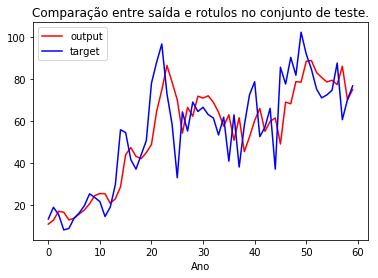

In [16]:
plt.plot(out_test, '-r')
plt.plot(y_test, '-b')
plt.xlabel('Ano')
plt.legend(('output', 'target'))
plt.title('Comparação entre saída e rotulos no conjunto de teste.')
plt.show()

## b) Seleção de variáveis, validação cruzada e regularização

In [17]:
mmq_l2 = lambda Phi, y, l: np.dot(np.dot(np.linalg.inv(np.dot(Phi.T, Phi) + l*np.eye(Phi.shape[1])), Phi.T), y)

In [39]:
def kfold(Phi, y, L, lamb_vec, v=0):
    """Returns best rmse and lambda using L folds for cross-validation."""
    N = Phi.shape[0]
    min_rmse = 9999
    min_lamb = None
    M = N//L # size of folds
    for l in lamb_vec:
        error = 0
        for i in range(L):
            train_slc = list(range(i*M)) + list(range((i+1)*M, N))
            test_slc = list(range(i*M,(i+1)*M))
            print(Phi[train_slc])
            w = mmq_l2(Phi[train_slc], y[train_slc], l)
            out = linreg(w, Phi[test_slc])
            error += rmse(out, y[test_slc])
            if v:
                print(error)
        error /= L
        if v:
            print('[', error, ']')
        if error < min_rmse:
            min_rmse = error
            min_lamb = l
            
    return (min_rmse, min_lamb)

In [40]:
def wrapper(Phi, y, K, L, lamb_vec, v=1):
    """Backward selection of the N inputs using K fold cross validation for choosing ridge regression hyperparameter."""
    idx_vec = list(range(21))
    idx_mask = [1]*21
    mask = [e for e, f in zip(idx_vec, idx_mask) if f]
    ret = []
    (error, lamb) = kfold(Phi, y, L, lamb_vec, v>1)
    ret.append([0, error, lamb, mask])
    for i in range(1, K):
        min_error = 9999
        for j in mask[1:]:
            idx_mask[j] = 0
            mask = [e for e, f in zip(idx_vec, idx_mask) if f]
            (error, lamb) = kfold(Phi[mask], y, L, lamb_vec, v>1)
            idx_mask[j] = 1
            if error < min_error:
                min_error = error
                min_l = lamb
                min_idx = j
            if v > 1:
                print("\tN = {} | min RMSE = {:.4f} | drop= {} | lambda = {}".format(i, error, j, lamb))
        idx_mask[min_idx] = 0
        mask = [e for e, f in zip(idx_vec, idx_mask) if f]
        ret.append([i, error, lamb, mask])
        if v > 0:
            print("min RMSE = {:13.10f} | lambda = {} | Features: ".format(min_error, min_l), end="")
            print(mask)
            print()
    return ret

In [ ]:
lamb_vec = [0, 1, 3, 6, 10, 30, 60, 100, 300, 600]
vec = wrapper(Phi_train, y_train, 20, 5, lamb_vec, 1)

[[ 1.  46.  44.  ... 27.  40.1 10.5]
 [ 1.  48.  46.  ... 29.  27.  40.1]
 [ 1.  50.  48.  ... 30.  29.  27. ]
 ...
 [ 1.   4.3  0.  ...  2.9  9.3  2.1]
 [ 1.   4.8  4.3 ...  3.2  2.9  9.3]
 [ 1.   4.1  4.8 ...  3.4  3.2  2.9]]
[[  1.  103.   85.4 ...  70.   62.6  58. ]
 [  1.   91.2 103.  ...  55.7  70.   62.6]
 [  1.   65.7  91.2 ...  85.   55.7  70. ]
 ...
 [  1.    4.3   0.  ...   2.9   9.3   2.1]
 [  1.    4.8   4.3 ...   3.2   2.9   9.3]
 [  1.    4.1   4.8 ...   3.4   3.2   2.9]]
[[  1.  103.   85.4 ...  70.   62.6  58. ]
 [  1.   91.2 103.  ...  55.7  70.   62.6]
 [  1.   65.7  91.2 ...  85.   55.7  70. ]
 ...
 [  1.    4.3   0.  ...   2.9   9.3   2.1]
 [  1.    4.8   4.3 ...   3.2   2.9   9.3]
 [  1.    4.1   4.8 ...   3.4   3.2   2.9]]
[[  1.  103.   85.4 ...  70.   62.6  58. ]
 [  1.   91.2 103.  ...  55.7  70.   62.6]
 [  1.   65.7  91.2 ...  85.   55.7  70. ]
 ...
 [  1.    4.3   0.  ...   2.9   9.3   2.1]
 [  1.    4.8   4.3 ...   3.2   2.9   9.3]
 [  1.    4.1   4.8 ... 

[[  1.  103.   85.4 ...  70.   62.6  58. ]
 [  1.   91.2 103.  ...  55.7  70.   62.6]
 [  1.   65.7  91.2 ...  85.   55.7  70. ]
 ...
 [  1.    4.3   0.  ...   2.9   9.3   2.1]
 [  1.    4.8   4.3 ...   3.2   2.9   9.3]
 [  1.    4.1   4.8 ...   3.4   3.2   2.9]]
[[  1.  103.   85.4 ...  70.   62.6  58. ]
 [  1.   91.2 103.  ...  55.7  70.   62.6]
 [  1.   65.7  91.2 ...  85.   55.7  70. ]
 ...
 [  1.  210.9 253.8 ... 116.6 136.6 110.7]
 [  1.    4.8   4.3 ...   3.2   2.9   9.3]
 [  1.    4.1   4.8 ...   3.4   3.2   2.9]]
[[ 1.  46.  44.  ... 27.  40.1 10.5]
 [ 1.  48.  46.  ... 29.  27.  40.1]
 [ 1.  50.  48.  ... 30.  29.  27. ]
 ...
 [ 1.   4.3  0.  ...  2.9  9.3  2.1]
 [ 1.   4.8  4.3 ...  3.2  2.9  9.3]
 [ 1.   4.1  4.8 ...  3.4  3.2  2.9]]
[[  1.  103.   85.4 ...  70.   62.6  58. ]
 [  1.   91.2 103.  ...  55.7  70.   62.6]
 [  1.   65.7  91.2 ...  85.   55.7  70. ]
 ...
 [  1.    4.3   0.  ...   2.9   9.3   2.1]
 [  1.    4.8   4.3 ...   3.2   2.9   9.3]
 [  1.    4.1   4.8 ... 

[[  1.   70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2
   75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5]
 [  1.   43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3
   89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8]
 [  1.   45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.
   88.3  89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3]
 [  1.   56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.
   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5  75.9]
 [  1.   60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4
  100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5]
 [  1.   50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.
   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6]
 [  1.   66.3  50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2
  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2]
 [  1.   59.8  66.3  50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7
   91.2 103.

[[  1.   70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2
   75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5]
 [  1.   43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3
   89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8]
 [  1.   45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.
   88.3  89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3]
 [  1.   56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.
   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5  75.9]
 [  1.   60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4
  100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5]
 [  1.   50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.
   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6]
 [  1.   66.3  50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2
  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2]
 [  1.   59.8  66.3  50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7
   91.2 103.

[[  1.   70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2
   75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5]
 [  1.   43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3
   89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8]
 [  1.   45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.
   88.3  89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3]
 [  1.   56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.
   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5  75.9]
 [  1.   60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4
  100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5]
 [  1.   50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.
   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6]
 [  1.   66.3  50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2
  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2]
 [  1.   59.8  66.3  50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7
   91.2 103.

[[  1.   70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2
   75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5]
 [  1.   43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3
   89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8]
 [  1.   45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.
   88.3  89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3]
 [  1.   56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.
   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5  75.9]
 [  1.   60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4
  100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5]
 [  1.   50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.
   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6]
 [  1.   66.3  50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2
  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2]
 [  1.   59.8  66.3  50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7
   91.2 103.

[[  1.  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5
   75.9  66.3  94.8  83.5  85.   55.7  70.   62.6  58. ]
 [  1.   65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2
  158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7  70. ]
 [  1.   63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3
   85.2 158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7]
 [  1.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9
   73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5  85. ]
 [  1.   70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2
   75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5]
 [  1.   43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3
   89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8]
 [  1.   45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.
   88.3  89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3]
 [  1.   56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.
   90.   88

[[  1.  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5
   75.9  66.3  94.8  83.5  85.   55.7  70.   62.6  58. ]
 [  1.   91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6
   75.5  75.9  66.3  94.8  83.5  85.   55.7  70.   62.6]
 [  1.   63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3
   85.2 158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7]
 [  1.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9
   73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5  85. ]
 [  1.   70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2
   75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5]
 [  1.   43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3
   89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8]
 [  1.   45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.
   88.3  89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3]
 [  1.   56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.
   90.   88

[[  1.  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5
   75.9  66.3  94.8  83.5  85.   55.7  70.   62.6  58. ]
 [  1.   91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6
   75.5  75.9  66.3  94.8  83.5  85.   55.7  70.   62.6]
 [  1.   63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3
   85.2 158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7]
 [  1.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9
   73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5  85. ]
 [  1.   70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2
   75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5]
 [  1.   43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3
   89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8]
 [  1.   45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.
   88.3  89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3]
 [  1.   56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.
   90.   88

[[  1.  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5
   75.9  66.3  94.8  83.5  85.   55.7  70.   62.6  58. ]
 [  1.   91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6
   75.5  75.9  66.3  94.8  83.5  85.   55.7  70.   62.6]
 [  1.   63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3
   85.2 158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7]
 [  1.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9
   73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5  85. ]
 [  1.   70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2
   75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5]
 [  1.   43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3
   89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8]
 [  1.   45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.
   88.3  89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3]
 [  1.   56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.
   90.   88

[[  1.  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5
   75.9  66.3  94.8  83.5  85.   55.7  70.   62.6  58. ]
 [  1.   91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6
   75.5  75.9  66.3  94.8  83.5  85.   55.7  70.   62.6]
 [  1.   63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3
   85.2 158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7]
 [  1.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9
   73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5  85. ]
 [  1.   70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2
   75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5]
 [  1.   43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3
   89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8]
 [  1.   45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.
   88.3  89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3]
 [  1.   56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.
   90.   88

[[  1.   70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2
   75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5]
 [  1.   43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3
   89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8]
 [  1.   45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.
   88.3  89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3]
 [  1.   56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.
   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5  75.9]
 [  1.   60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4
  100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5]
 [  1.   50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.
   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6]
 [  1.   66.3  50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2
  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2]
 [  1.   59.8  66.3  50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7
   91.2 103.

[[  1.   70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2
   75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5]
 [  1.   43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3
   89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8]
 [  1.   45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.
   88.3  89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3]
 [  1.   56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.
   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5  75.9]
 [  1.   60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4
  100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5]
 [  1.   50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.
   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6]
 [  1.   66.3  50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2
  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2]
 [  1.   59.8  66.3  50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7
   91.2 103.

[[  1.   70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2
   75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5]
 [  1.   43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3
   89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8]
 [  1.   45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.
   88.3  89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3]
 [  1.   56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.
   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5  75.9]
 [  1.   60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4
  100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5]
 [  1.   50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.
   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6]
 [  1.   66.3  50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2
  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2]
 [  1.   59.8  66.3  50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7
   91.2 103.

[[  1.  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5
   75.9  66.3  94.8  83.5  85.   55.7  70.   62.6  58. ]
 [  1.   91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6
   75.5  75.9  66.3  94.8  83.5  85.   55.7  70.   62.6]
 [  1.   65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2
  158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7  70. ]
 [  1.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9
   73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5  85. ]
 [  1.   70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2
   75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5]
 [  1.   43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3
   89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8]
 [  1.   45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.
   88.3  89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3]
 [  1.   56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.
   90.   88

[[  1.  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5
   75.9  66.3  94.8  83.5  85.   55.7  70.   62.6  58. ]
 [  1.   91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6
   75.5  75.9  66.3  94.8  83.5  85.   55.7  70.   62.6]
 [  1.   65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2
  158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7  70. ]
 [  1.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9
   73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5  85. ]
 [  1.   70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2
   75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5]
 [  1.   43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3
   89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8]
 [  1.   45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.
   88.3  89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3]
 [  1.   56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.
   90.   88

[[  1.  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5
   75.9  66.3  94.8  83.5  85.   55.7  70.   62.6  58. ]
 [  1.   91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6
   75.5  75.9  66.3  94.8  83.5  85.   55.7  70.   62.6]
 [  1.   65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2
  158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7  70. ]
 [  1.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9
   73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5  85. ]
 [  1.   70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2
   75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5]
 [  1.   43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3
   89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8]
 [  1.   45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.
   88.3  89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3]
 [  1.   56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.
   90.   88

[[  1.  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5
   75.9  66.3  94.8  83.5  85.   55.7  70.   62.6  58. ]
 [  1.   91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6
   75.5  75.9  66.3  94.8  83.5  85.   55.7  70.   62.6]
 [  1.   65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2
  158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7  70. ]
 [  1.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9
   73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5  85. ]
 [  1.   70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2
   75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5]
 [  1.   43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3
   89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8]
 [  1.   45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.
   88.3  89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3]
 [  1.   56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.
   90.   88

[[  1.  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5
   75.9  66.3  94.8  83.5  85.   55.7  70.   62.6  58. ]
 [  1.   91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6
   75.5  75.9  66.3  94.8  83.5  85.   55.7  70.   62.6]
 [  1.   65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2
  158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7  70. ]
 [  1.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9
   73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5  85. ]
 [  1.   60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4
  100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5]
 [  1.   50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.
   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6]
 [  1.   66.3  50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2
  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2]
 [  1.   59.8  66.3  50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7
   91.2 10

[[  1.   70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2
   75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5]
 [  1.   43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3
   89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8]
 [  1.   45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.
   88.3  89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3]
 [  1.   56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.
   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5  75.9]
 [  1.   60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4
  100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5]
 [  1.   50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.
   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6]
 [  1.   66.3  50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2
  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2]
 [  1.   59.8  66.3  50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7
   91.2 103.

[[  1.  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5
   75.9  66.3  94.8  83.5  85.   55.7  70.   62.6  58. ]
 [  1.   91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6
   75.5  75.9  66.3  94.8  83.5  85.   55.7  70.   62.6]
 [  1.   65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2
  158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7  70. ]
 [  1.   63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3
   85.2 158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7]
 [  1.   70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2
   75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5]
 [  1.   43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3
   89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8]
 [  1.   45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.
   88.3  89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3]
 [  1.   56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.
   90.   88

[[  1.  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5
   75.9  66.3  94.8  83.5  85.   55.7  70.   62.6  58. ]
 [  1.   91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6
   75.5  75.9  66.3  94.8  83.5  85.   55.7  70.   62.6]
 [  1.   65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2
  158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7  70. ]
 [  1.   63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3
   85.2 158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7]
 [  1.   70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2
   75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5]
 [  1.   43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3
   89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8]
 [  1.   45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.
   88.3  89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3]
 [  1.   56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.
   90.   88

[[  1.  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5
   75.9  66.3  94.8  83.5  85.   55.7  70.   62.6  58. ]
 [  1.   91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6
   75.5  75.9  66.3  94.8  83.5  85.   55.7  70.   62.6]
 [  1.   65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2
  158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7  70. ]
 [  1.   63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3
   85.2 158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7]
 [  1.   60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4
  100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5]
 [  1.   50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.
   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6]
 [  1.   66.3  50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2
  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2]
 [  1.   59.8  66.3  50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7
   91.2 10

[[  1.  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5
   75.9  66.3  94.8  83.5  85.   55.7  70.   62.6  58. ]
 [  1.   91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6
   75.5  75.9  66.3  94.8  83.5  85.   55.7  70.   62.6]
 [  1.   65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2
  158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7  70. ]
 [  1.   63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3
   85.2 158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7]
 [  1.   60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4
  100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5]
 [  1.   50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.
   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6]
 [  1.   66.3  50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2
  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2]
 [  1.   59.8  66.3  50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7
   91.2 10

[[  1.  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5
   75.9  66.3  94.8  83.5  85.   55.7  70.   62.6  58. ]
 [  1.   91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6
   75.5  75.9  66.3  94.8  83.5  85.   55.7  70.   62.6]
 [  1.   65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2
  158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7  70. ]
 [  1.   63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3
   85.2 158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7]
 [  1.   70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2
   75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5]
 [  1.   43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3
   89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8]
 [  1.   45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.
   88.3  89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3]
 [  1.   56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.
   90.   88

   60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2]]
[[  1.  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5
   75.9  66.3  94.8  83.5  85.   55.7  70.   62.6  58. ]
 [  1.   91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6
   75.5  75.9  66.3  94.8  83.5  85.   55.7  70.   62.6]
 [  1.   65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2
  158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7  70. ]
 [  1.   63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3
   85.2 158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7]
 [  1.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9
   73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5  85. ]
 [  1.   43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3
   89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8]
 [  1.   45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.
   88.3  89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3]
 [  1.   56.4  45.3  43.5 

[[  1.  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5
   75.9  66.3  94.8  83.5  85.   55.7  70.   62.6  58. ]
 [  1.   91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6
   75.5  75.9  66.3  94.8  83.5  85.   55.7  70.   62.6]
 [  1.   65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2
  158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7  70. ]
 [  1.   63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3
   85.2 158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7]
 [  1.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9
   73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5  85. ]
 [  1.   43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3
   89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8]
 [  1.   45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.
   88.3  89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3]
 [  1.   56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.
   90.   88

[[  1.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9
   73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5  85. ]
 [  1.   43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3
   89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8]
 [  1.   45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.
   88.3  89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3]
 [  1.   56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.
   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5  75.9]
 [  1.   60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4
  100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5]
 [  1.   50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.
   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6]
 [  1.   66.3  50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2
  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2]
 [  1.   59.8  66.3  50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7
   91.2 103.

[[  1.  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5
   75.9  66.3  94.8  83.5  85.   55.7  70.   62.6  58. ]
 [  1.   91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6
   75.5  75.9  66.3  94.8  83.5  85.   55.7  70.   62.6]
 [  1.   65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2
  158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7  70. ]
 [  1.   63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3
   85.2 158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7]
 [  1.   60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4
  100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5]
 [  1.   50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.
   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6]
 [  1.   66.3  50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2
  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2]
 [  1.   59.8  66.3  50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7
   91.2 10

[[  1.  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5
   75.9  66.3  94.8  83.5  85.   55.7  70.   62.6  58. ]
 [  1.   91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6
   75.5  75.9  66.3  94.8  83.5  85.   55.7  70.   62.6]
 [  1.   65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2
  158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7  70. ]
 [  1.   63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3
   85.2 158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7]
 [  1.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9
   73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5  85. ]
 [  1.   43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3
   89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8]
 [  1.   45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.
   88.3  89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3]
 [  1.   56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.
   90.   88

[[  1.  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5
   75.9  66.3  94.8  83.5  85.   55.7  70.   62.6  58. ]
 [  1.   91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6
   75.5  75.9  66.3  94.8  83.5  85.   55.7  70.   62.6]
 [  1.   65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2
  158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7  70. ]
 [  1.   63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3
   85.2 158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7]
 [  1.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9
   73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5  85. ]
 [  1.   70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2
   75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5]
 [  1.   45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.
   88.3  89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3]
 [  1.   56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.
   90.   88

[[  1.  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5
   75.9  66.3  94.8  83.5  85.   55.7  70.   62.6  58. ]
 [  1.   91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6
   75.5  75.9  66.3  94.8  83.5  85.   55.7  70.   62.6]
 [  1.   65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2
  158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7  70. ]
 [  1.   63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3
   85.2 158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7]
 [  1.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9
   73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5  85. ]
 [  1.   70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2
   75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5]
 [  1.   45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.
   88.3  89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3]
 [  1.   56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.
   90.   88

[[  1.  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5
   75.9  66.3  94.8  83.5  85.   55.7  70.   62.6  58. ]
 [  1.   91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6
   75.5  75.9  66.3  94.8  83.5  85.   55.7  70.   62.6]
 [  1.   65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2
  158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7  70. ]
 [  1.   63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3
   85.2 158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7]
 [  1.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9
   73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5  85. ]
 [  1.   70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2
   75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5]
 [  1.   45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.
   88.3  89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3]
 [  1.   56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.
   90.   88

[[  1.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9
   73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5  85. ]
 [  1.   70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2
   75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5]
 [  1.   45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.
   88.3  89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3]
 [  1.   56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.
   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5  75.9]
 [  1.   60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4
  100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5]
 [  1.   50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.
   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6]
 [  1.   66.3  50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2
  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2]
 [  1.   59.8  66.3  50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7
   91.2 103.

[[  1.  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5
   75.9  66.3  94.8  83.5  85.   55.7  70.   62.6  58. ]
 [  1.   91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6
   75.5  75.9  66.3  94.8  83.5  85.   55.7  70.   62.6]
 [  1.   65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2
  158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7  70. ]
 [  1.   63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3
   85.2 158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7]
 [  1.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9
   73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5  85. ]
 [  1.   70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2
   75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5]
 [  1.   45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.
   88.3  89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3]
 [  1.   56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.
   90.   88

[[  1.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9
   73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5  85. ]
 [  1.   70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2
   75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5]
 [  1.   43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3
   89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8]
 [  1.   56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.
   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5  75.9]
 [  1.   60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4
  100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5]
 [  1.   50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.
   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6]
 [  1.   66.3  50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2
  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2]
 [  1.   59.8  66.3  50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7
   91.2 103

[[  1.  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5
   75.9  66.3  94.8  83.5  85.   55.7  70.   62.6  58. ]
 [  1.   91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6
   75.5  75.9  66.3  94.8  83.5  85.   55.7  70.   62.6]
 [  1.   65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2
  158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7  70. ]
 [  1.   63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3
   85.2 158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7]
 [  1.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9
   73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5  85. ]
 [  1.   70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2
   75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5]
 [  1.   43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3
   89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8]
 [  1.   56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.
   90.   8

[[  1.  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5
   75.9  66.3  94.8  83.5  85.   55.7  70.   62.6  58. ]
 [  1.   91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6
   75.5  75.9  66.3  94.8  83.5  85.   55.7  70.   62.6]
 [  1.   65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2
  158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7  70. ]
 [  1.   63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3
   85.2 158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7]
 [  1.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9
   73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5  85. ]
 [  1.   70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2
   75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5]
 [  1.   43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3
   89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8]
 [  1.   56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.
   90.   8

[[  1.  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5
   75.9  66.3  94.8  83.5  85.   55.7  70.   62.6  58. ]
 [  1.   91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6
   75.5  75.9  66.3  94.8  83.5  85.   55.7  70.   62.6]
 [  1.   65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2
  158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7  70. ]
 [  1.   63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3
   85.2 158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7]
 [  1.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9
   73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5  85. ]
 [  1.   70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2
   75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5]
 [  1.   43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3
   89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8]
 [  1.   56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.
   90.   8

[[  1.  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5
   75.9  66.3  94.8  83.5  85.   55.7  70.   62.6  58. ]
 [  1.   91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6
   75.5  75.9  66.3  94.8  83.5  85.   55.7  70.   62.6]
 [  1.   65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2
  158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7  70. ]
 [  1.   63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3
   85.2 158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7]
 [  1.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9
   73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5  85. ]
 [  1.   70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2
   75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5]
 [  1.   43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3
   89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8]
 [  1.   56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.
   90.   8

[[  1.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9
   73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5  85. ]
 [  1.   70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2
   75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5]
 [  1.   43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3
   89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8]
 [  1.   45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.
   88.3  89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3]
 [  1.   60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4
  100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5]
 [  1.   50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.
   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6]
 [  1.   66.3  50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2
  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2]
 [  1.   59.8  66.3  50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7
   91.2 103

[[  1.  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5
   75.9  66.3  94.8  83.5  85.   55.7  70.   62.6  58. ]
 [  1.   91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6
   75.5  75.9  66.3  94.8  83.5  85.   55.7  70.   62.6]
 [  1.   65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2
  158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7  70. ]
 [  1.   63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3
   85.2 158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7]
 [  1.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9
   73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5  85. ]
 [  1.   70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2
   75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5]
 [  1.   43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3
   89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8]
 [  1.   45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.
   88.3  8

[[  1.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9
   73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5  85. ]
 [  1.   70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2
   75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5]
 [  1.   43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3
   89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8]
 [  1.   45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.
   88.3  89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3]
 [  1.   60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4
  100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5]
 [  1.   50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.
   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6]
 [  1.   66.3  50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2
  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2]
 [  1.   59.8  66.3  50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7
   91.2 103

[[  1.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9
   73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5  85. ]
 [  1.   70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2
   75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5]
 [  1.   43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3
   89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8]
 [  1.   45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.
   88.3  89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3]
 [  1.   60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4
  100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5]
 [  1.   50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.
   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6]
 [  1.   66.3  50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2
  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2]
 [  1.   59.8  66.3  50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7
   91.2 103

[[  1.  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5
   75.9  66.3  94.8  83.5  85.   55.7  70.   62.6  58. ]
 [  1.   91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6
   75.5  75.9  66.3  94.8  83.5  85.   55.7  70.   62.6]
 [  1.   65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2
  158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7  70. ]
 [  1.   63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3
   85.2 158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7]
 [  1.   56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.
   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5  75.9]
 [  1.   50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.
   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6]
 [  1.   66.3  50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2
  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2]
 [  1.   59.8  66.3  50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7
   91.2 103

[[  1.  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5
   75.9  66.3  94.8  83.5  85.   55.7  70.   62.6  58. ]
 [  1.   91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6
   75.5  75.9  66.3  94.8  83.5  85.   55.7  70.   62.6]
 [  1.   65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2
  158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7  70. ]
 [  1.   63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3
   85.2 158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7]
 [  1.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9
   73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5  85. ]
 [  1.   70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2
   75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5]
 [  1.   43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3
   89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8]
 [  1.   45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.
   88.3  8

[[  1.  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5
   75.9  66.3  94.8  83.5  85.   55.7  70.   62.6  58. ]
 [  1.   91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6
   75.5  75.9  66.3  94.8  83.5  85.   55.7  70.   62.6]
 [  1.   65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2
  158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7  70. ]
 [  1.   63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3
   85.2 158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7]
 [  1.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9
   73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5  85. ]
 [  1.   70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2
   75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5]
 [  1.   43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3
   89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8]
 [  1.   45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.
   88.3  8

[[  1.  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5
   75.9  66.3  94.8  83.5  85.   55.7  70.   62.6  58. ]
 [  1.   91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6
   75.5  75.9  66.3  94.8  83.5  85.   55.7  70.   62.6]
 [  1.   65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2
  158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7  70. ]
 [  1.   63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3
   85.2 158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7]
 [  1.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9
   73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5  85. ]
 [  1.   70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2
   75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5]
 [  1.   43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3
   89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8]
 [  1.   45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.
   88.3  8

[[  1.  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5
   75.9  66.3  94.8  83.5  85.   55.7  70.   62.6  58. ]
 [  1.   91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6
   75.5  75.9  66.3  94.8  83.5  85.   55.7  70.   62.6]
 [  1.   65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2
  158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7  70. ]
 [  1.   63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3
   85.2 158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7]
 [  1.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9
   73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5  85. ]
 [  1.   70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2
   75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5]
 [  1.   43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3
   89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8]
 [  1.   45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.
   88.3  8

[[  1.  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5
   75.9  66.3  94.8  83.5  85.   55.7  70.   62.6  58. ]
 [  1.   91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6
   75.5  75.9  66.3  94.8  83.5  85.   55.7  70.   62.6]
 [  1.   65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2
  158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7  70. ]
 [  1.   63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3
   85.2 158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7]
 [  1.   56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.
   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5  75.9]
 [  1.   50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.
   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6]
 [  1.   66.3  50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2
  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2]
 [  1.   59.8  66.3  50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7
   91.2 103

[[  1.  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5
   75.9  66.3  94.8  83.5  85.   55.7  70.   62.6  58. ]
 [  1.   91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6
   75.5  75.9  66.3  94.8  83.5  85.   55.7  70.   62.6]
 [  1.   65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2
  158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7  70. ]
 [  1.   63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3
   85.2 158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7]
 [  1.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9
   73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5  85. ]
 [  1.   70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2
   75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5]
 [  1.   43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3
   89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8]
 [  1.   45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.
   88.3  8

[[  1.  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5
   75.9  66.3  94.8  83.5  85.   55.7  70.   62.6  58. ]
 [  1.   91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6
   75.5  75.9  66.3  94.8  83.5  85.   55.7  70.   62.6]
 [  1.   65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2
  158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7  70. ]
 [  1.   63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3
   85.2 158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7]
 [  1.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9
   73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5  85. ]
 [  1.   70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2
   75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5]
 [  1.   43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3
   89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8]
 [  1.   45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.
   88.3  8

[[  1.  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5
   75.9  66.3  94.8  83.5  85.   55.7  70.   62.6  58. ]
 [  1.   91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6
   75.5  75.9  66.3  94.8  83.5  85.   55.7  70.   62.6]
 [  1.   65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2
  158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7  70. ]
 [  1.   63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3
   85.2 158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7]
 [  1.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9
   73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5  85. ]
 [  1.   70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2
   75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5]
 [  1.   43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3
   89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8]
 [  1.   45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.
   88.3  8

[[  1.  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5
   75.9  66.3  94.8  83.5  85.   55.7  70.   62.6  58. ]
 [  1.   91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6
   75.5  75.9  66.3  94.8  83.5  85.   55.7  70.   62.6]
 [  1.   65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2
  158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7  70. ]
 [  1.   63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3
   85.2 158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7]
 [  1.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9
   73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5  85. ]
 [  1.   70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2
   75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5]
 [  1.   43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3
   89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8]
 [  1.   45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.
   88.3  8

[[  1.  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5
   75.9  66.3  94.8  83.5  85.   55.7  70.   62.6  58. ]
 [  1.   91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6
   75.5  75.9  66.3  94.8  83.5  85.   55.7  70.   62.6]
 [  1.   65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2
  158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7  70. ]
 [  1.   63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3
   85.2 158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7]
 [  1.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9
   73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5  85. ]
 [  1.   70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2
   75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5]
 [  1.   43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3
   89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8]
 [  1.   45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.
   88.3  8

[[  1.  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5
   75.9  66.3  94.8  83.5  85.   55.7  70.   62.6  58. ]
 [  1.   91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6
   75.5  75.9  66.3  94.8  83.5  85.   55.7  70.   62.6]
 [  1.   65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2
  158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7  70. ]
 [  1.   63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3
   85.2 158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7]
 [  1.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9
   73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5  85. ]
 [  1.   70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2
   75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5]
 [  1.   43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3
   89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8]
 [  1.   45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.
   88.3  8

[[  1.  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5
   75.9  66.3  94.8  83.5  85.   55.7  70.   62.6  58. ]
 [  1.   91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6
   75.5  75.9  66.3  94.8  83.5  85.   55.7  70.   62.6]
 [  1.   65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2
  158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7  70. ]
 [  1.   63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3
   85.2 158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7]
 [  1.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9
   73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5  85. ]
 [  1.   70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2
   75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5]
 [  1.   43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3
   89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8]
 [  1.   45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.
   88.3  8

[[  1.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9
   73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5  85. ]
 [  1.   70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2
   75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5]
 [  1.   43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3
   89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8]
 [  1.   45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.
   88.3  89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3]
 [  1.   56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.
   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5  75.9]
 [  1.   60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4
  100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5]
 [  1.   50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.
   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6]
 [  1.   59.8  66.3  50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7
   91.2 103.

[[  1.  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5
   75.9  66.3  94.8  83.5  85.   55.7  70.   62.6  58. ]
 [  1.   91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6
   75.5  75.9  66.3  94.8  83.5  85.   55.7  70.   62.6]
 [  1.   65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2
  158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7  70. ]
 [  1.   63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3
   85.2 158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7]
 [  1.   56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.
   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5  75.9]
 [  1.   60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4
  100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5]
 [  1.   50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.
   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6]
 [  1.   59.8  66.3  50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7
   91.2 103

[[  1.  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5
   75.9  66.3  94.8  83.5  85.   55.7  70.   62.6  58. ]
 [  1.   91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6
   75.5  75.9  66.3  94.8  83.5  85.   55.7  70.   62.6]
 [  1.   65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2
  158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7  70. ]
 [  1.   63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3
   85.2 158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7]
 [  1.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9
   73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5  85. ]
 [  1.   70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2
   75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5]
 [  1.   43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3
   89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8]
 [  1.   45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.
   88.3  8

[[  1.  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5
   75.9  66.3  94.8  83.5  85.   55.7  70.   62.6  58. ]
 [  1.   91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6
   75.5  75.9  66.3  94.8  83.5  85.   55.7  70.   62.6]
 [  1.   65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2
  158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7  70. ]
 [  1.   63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3
   85.2 158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7]
 [  1.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9
   73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5  85. ]
 [  1.   70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2
   75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5]
 [  1.   43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3
   89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8]
 [  1.   45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.
   88.3  8

[[  1.  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5
   75.9  66.3  94.8  83.5  85.   55.7  70.   62.6  58. ]
 [  1.   91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6
   75.5  75.9  66.3  94.8  83.5  85.   55.7  70.   62.6]
 [  1.   65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2
  158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7  70. ]
 [  1.   63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3
   85.2 158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7]
 [  1.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9
   73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5  85. ]
 [  1.   70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2
   75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5]
 [  1.   43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3
   89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8]
 [  1.   45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.
   88.3  8

[[  1.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9
   73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5  85. ]
 [  1.   70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2
   75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5]
 [  1.   43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3
   89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8]
 [  1.   45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.
   88.3  89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3]
 [  1.   56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.
   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5  75.9]
 [  1.   60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4
  100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5]
 [  1.   50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.
   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6]
 [  1.   66.3  50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2
  103.   85.

[[  1.  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5
   75.9  66.3  94.8  83.5  85.   55.7  70.   62.6  58. ]
 [  1.   91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6
   75.5  75.9  66.3  94.8  83.5  85.   55.7  70.   62.6]
 [  1.   65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2
  158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7  70. ]
 [  1.   63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3
   85.2 158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7]
 [  1.   56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.
   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5  75.9]
 [  1.   60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4
  100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5]
 [  1.   50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.
   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6]
 [  1.   66.3  50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2
  103.   85

   70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90. ]]
[[  1.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9
   73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5  85. ]
 [  1.   70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2
   75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5]
 [  1.   43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3
   89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8]
 [  1.   45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.
   88.3  89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3]
 [  1.   56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.
   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5  75.9]
 [  1.   60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4
  100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5]
 [  1.   50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.
   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6]
 [  1.   66.3  50.7  60.7  5

[[  1.  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5
   75.9  66.3  94.8  83.5  85.   55.7  70.   62.6  58. ]
 [  1.   91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6
   75.5  75.9  66.3  94.8  83.5  85.   55.7  70.   62.6]
 [  1.   65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2
  158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7  70. ]
 [  1.   63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3
   85.2 158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7]
 [  1.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9
   73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5  85. ]
 [  1.   70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2
   75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5]
 [  1.   43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3
   89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8]
 [  1.   45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.
   88.3  8

[[  1.  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5
   75.9  66.3  94.8  83.5  85.   55.7  70.   62.6  58. ]
 [  1.   91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6
   75.5  75.9  66.3  94.8  83.5  85.   55.7  70.   62.6]
 [  1.   65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2
  158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7  70. ]
 [  1.   63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3
   85.2 158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7]
 [  1.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9
   73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5  85. ]
 [  1.   70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2
   75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5]
 [  1.   43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3
   89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8]
 [  1.   45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.
   88.3  8

[[  1.  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5
   75.9  66.3  94.8  83.5  85.   55.7  70.   62.6  58. ]
 [  1.   91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6
   75.5  75.9  66.3  94.8  83.5  85.   55.7  70.   62.6]
 [  1.   65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2
  158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7  70. ]
 [  1.   63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3
   85.2 158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7]
 [  1.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9
   73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5  85. ]
 [  1.   70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2
   75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5]
 [  1.   43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3
   89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8]
 [  1.   45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.
   88.3  8

[[  1.  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5
   75.9  66.3  94.8  83.5  85.   55.7  70.   62.6  58. ]
 [  1.   91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6
   75.5  75.9  66.3  94.8  83.5  85.   55.7  70.   62.6]
 [  1.   65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2
  158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7  70. ]
 [  1.   63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3
   85.2 158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7]
 [  1.   56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.
   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5  75.9]
 [  1.   60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4
  100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5]
 [  1.   50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.
   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6]
 [  1.   66.3  50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2
  103.   85

[[  1.  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5
   75.9  66.3  94.8  83.5  85.   55.7  70.   62.6  58. ]
 [  1.   91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6
   75.5  75.9  66.3  94.8  83.5  85.   55.7  70.   62.6]
 [  1.   65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2
  158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7  70. ]
 [  1.   63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3
   85.2 158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7]
 [  1.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9
   73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5  85. ]
 [  1.   70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2
   75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5]
 [  1.   43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3
   89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8]
 [  1.   45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.
   88.3  8

[[  1.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9
   73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5  85. ]
 [  1.   70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2
   75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5]
 [  1.   43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3
   89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8]
 [  1.   45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.
   88.3  89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3]
 [  1.   56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.
   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5  75.9]
 [  1.   60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4
  100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5]
 [  1.   50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.
   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6]
 [  1.   66.3  50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2
  103.   85.

[[  1.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9
   73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5  85. ]
 [  1.   70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2
   75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5]
 [  1.   43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3
   89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8]
 [  1.   45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.
   88.3  89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3]
 [  1.   56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.
   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5  75.9]
 [  1.   60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4
  100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5]
 [  1.   50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.
   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6]
 [  1.   66.3  50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2
  103.   85.

[[  1.  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5
   75.9  66.3  94.8  83.5  85.   55.7  70.   62.6  58. ]
 [  1.   91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6
   75.5  75.9  66.3  94.8  83.5  85.   55.7  70.   62.6]
 [  1.   65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2
  158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7  70. ]
 [  1.   63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3
   85.2 158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7]
 [  1.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9
   73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5  85. ]
 [  1.   70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2
   75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5]
 [  1.   43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3
   89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8]
 [  1.   45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.
   88.3  8

[[  1.  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5
   75.9  66.3  94.8  83.5  85.   55.7  70.   62.6  58. ]
 [  1.   91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6
   75.5  75.9  66.3  94.8  83.5  85.   55.7  70.   62.6]
 [  1.   65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2
  158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7  70. ]
 [  1.   63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3
   85.2 158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7]
 [  1.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9
   73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5  85. ]
 [  1.   70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2
   75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5]
 [  1.   43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3
   89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8]
 [  1.   45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.
   88.3  8

[[  1.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9
   73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5  85. ]
 [  1.   70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2
   75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5]
 [  1.   43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3
   89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8]
 [  1.   45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.
   88.3  89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3]
 [  1.   56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.
   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5  75.9]
 [  1.   60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4
  100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5]
 [  1.   50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.
   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6]
 [  1.   66.3  50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2
  103.   85.

[[  1.  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5
   75.9  66.3  94.8  83.5  85.   55.7  70.   62.6  58. ]
 [  1.   91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6
   75.5  75.9  66.3  94.8  83.5  85.   55.7  70.   62.6]
 [  1.   65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2
  158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7  70. ]
 [  1.   63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3
   85.2 158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7]
 [  1.   56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.
   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5  75.9]
 [  1.   60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4
  100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5]
 [  1.   50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.
   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6]
 [  1.   66.3  50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2
  103.   85

[[  1.  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5
   75.9  66.3  94.8  83.5  85.   55.7  70.   62.6  58. ]
 [  1.   91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6
   75.5  75.9  66.3  94.8  83.5  85.   55.7  70.   62.6]
 [  1.   65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2
  158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7  70. ]
 [  1.   63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3
   85.2 158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7]
 [  1.   56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.
   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5  75.9]
 [  1.   60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4
  100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5]
 [  1.   50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.
   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6]
 [  1.   66.3  50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2
  103.   85

[[  1.  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5
   75.9  66.3  94.8  83.5  85.   55.7  70.   62.6  58. ]
 [  1.   91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6
   75.5  75.9  66.3  94.8  83.5  85.   55.7  70.   62.6]
 [  1.   65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2
  158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7  70. ]
 [  1.   63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3
   85.2 158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7]
 [  1.   56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.
   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5  75.9]
 [  1.   60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4
  100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5]
 [  1.   50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.
   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6]
 [  1.   66.3  50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2
  103.   85

[[  1.  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5
   75.9  66.3  94.8  83.5  85.   55.7  70.   62.6  58. ]
 [  1.   91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6
   75.5  75.9  66.3  94.8  83.5  85.   55.7  70.   62.6]
 [  1.   65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2
  158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7  70. ]
 [  1.   63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3
   85.2 158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7]
 [  1.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9
   73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5  85. ]
 [  1.   70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2
   75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5]
 [  1.   43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3
   89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8]
 [  1.   45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.
   88.3  8

[[  1.  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5
   75.9  66.3  94.8  83.5  85.   55.7  70.   62.6  58. ]
 [  1.   91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6
   75.5  75.9  66.3  94.8  83.5  85.   55.7  70.   62.6]
 [  1.   65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2
  158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7  70. ]
 [  1.   63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3
   85.2 158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7]
 [  1.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9
   73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5  85. ]
 [  1.   70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2
   75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5]
 [  1.   43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3
   89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8]
 [  1.   45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.
   88.3  8

[[  1.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9
   73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5  85. ]
 [  1.   70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2
   75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5]
 [  1.   43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3
   89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8]
 [  1.   45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.
   88.3  89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3]
 [  1.   56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.
   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5  75.9]
 [  1.   60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4
  100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5]
 [  1.   50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.
   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6]
 [  1.   66.3  50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2
  103.   85.

[[  1.  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5
   75.9  66.3  94.8  83.5  85.   55.7  70.   62.6  58. ]
 [  1.   91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6
   75.5  75.9  66.3  94.8  83.5  85.   55.7  70.   62.6]
 [  1.   65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2
  158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7  70. ]
 [  1.   63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3
   85.2 158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7]
 [  1.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9
   73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5  85. ]
 [  1.   70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2
   75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5]
 [  1.   43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3
   89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8]
 [  1.   45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.
   88.3  8

[[  1.  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5
   75.9  66.3  94.8  83.5  85.   55.7  70.   62.6  58. ]
 [  1.   91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6
   75.5  75.9  66.3  94.8  83.5  85.   55.7  70.   62.6]
 [  1.   65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2
  158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7  70. ]
 [  1.   63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3
   85.2 158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7]
 [  1.   56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.
   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5  75.9]
 [  1.   60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4
  100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5]
 [  1.   50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.
   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6]
 [  1.   66.3  50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2
  103.   85

[[  1.  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5
   75.9  66.3  94.8  83.5  85.   55.7  70.   62.6  58. ]
 [  1.   91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6
   75.5  75.9  66.3  94.8  83.5  85.   55.7  70.   62.6]
 [  1.   65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2
  158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7  70. ]
 [  1.   63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3
   85.2 158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7]
 [  1.   56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.
   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5  75.9]
 [  1.   60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4
  100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5]
 [  1.   50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.
   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6]
 [  1.   66.3  50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2
  103.   85

[[  1.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9
   73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5  85. ]
 [  1.   70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2
   75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5]
 [  1.   43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3
   89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8]
 [  1.   45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.
   88.3  89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3]
 [  1.   56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.
   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5  75.9]
 [  1.   60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4
  100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5]
 [  1.   50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.
   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6]
 [  1.   66.3  50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2
  103.   85.

[[  1.  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5
   75.9  66.3  94.8  83.5  85.   55.7  70.   62.6  58. ]
 [  1.   91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6
   75.5  75.9  66.3  94.8  83.5  85.   55.7  70.   62.6]
 [  1.   65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2
  158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7  70. ]
 [  1.   63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3
   85.2 158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7]
 [  1.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9
   73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5  85. ]
 [  1.   70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2
   75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5]
 [  1.   43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3
   89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8]
 [  1.   45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.
   88.3  8

[[  1.  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5
   75.9  66.3  94.8  83.5  85.   55.7  70.   62.6  58. ]
 [  1.   91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6
   75.5  75.9  66.3  94.8  83.5  85.   55.7  70.   62.6]
 [  1.   65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2
  158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7  70. ]
 [  1.   63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3
   85.2 158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7]
 [  1.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9
   73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5  85. ]
 [  1.   70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2
   75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5]
 [  1.   43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3
   89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8]
 [  1.   45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.
   88.3  8

[[  1.  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5
   75.9  66.3  94.8  83.5  85.   55.7  70.   62.6  58. ]
 [  1.   91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6
   75.5  75.9  66.3  94.8  83.5  85.   55.7  70.   62.6]
 [  1.   65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2
  158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7  70. ]
 [  1.   63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3
   85.2 158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7]
 [  1.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9
   73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5  85. ]
 [  1.   70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2
   75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5]
 [  1.   43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3
   89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8]
 [  1.   45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.
   88.3  8

[[  1.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9
   73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5  85. ]
 [  1.   70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2
   75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5]
 [  1.   43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3
   89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8]
 [  1.   45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.
   88.3  89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3]
 [  1.   56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.
   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5  75.9]
 [  1.   60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4
  100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5]
 [  1.   50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.
   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6]
 [  1.   66.3  50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2
  103.   85.

[[  1.  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5
   75.9  66.3  94.8  83.5  85.   55.7  70.   62.6  58. ]
 [  1.   91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6
   75.5  75.9  66.3  94.8  83.5  85.   55.7  70.   62.6]
 [  1.   65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2
  158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7  70. ]
 [  1.   63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3
   85.2 158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7]
 [  1.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9
   73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5  85. ]
 [  1.   70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2
   75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5]
 [  1.   43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3
   89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8]
 [  1.   45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.
   88.3  8

[[  1.  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5
   75.9  66.3  94.8  83.5  85.   55.7  70.   62.6  58. ]
 [  1.   91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6
   75.5  75.9  66.3  94.8  83.5  85.   55.7  70.   62.6]
 [  1.   65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2
  158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7  70. ]
 [  1.   63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3
   85.2 158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7]
 [  1.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9
   73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5  85. ]
 [  1.   70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2
   75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5]
 [  1.   43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3
   89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8]
 [  1.   45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.
   88.3  8

[[  1.  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5
   75.9  66.3  94.8  83.5  85.   55.7  70.   62.6  58. ]
 [  1.   91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6
   75.5  75.9  66.3  94.8  83.5  85.   55.7  70.   62.6]
 [  1.   65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2
  158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7  70. ]
 [  1.   63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3
   85.2 158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7]
 [  1.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9
   73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5  85. ]
 [  1.   70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2
   75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5]
 [  1.   43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3
   89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8]
 [  1.   45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.
   88.3  8

   60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2]]
[[  1.  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5
   75.9  66.3  94.8  83.5  85.   55.7  70.   62.6  58. ]
 [  1.   91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6
   75.5  75.9  66.3  94.8  83.5  85.   55.7  70.   62.6]
 [  1.   65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2
  158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7  70. ]
 [  1.   63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3
   85.2 158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7]
 [  1.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9
   73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5  85. ]
 [  1.   70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2
   75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5]
 [  1.   43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3
   89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8]
 [  1.   45.3  43.5  70. 

[[  1.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9
   73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5  85. ]
 [  1.   70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2
   75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5]
 [  1.   43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3
   89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8]
 [  1.   45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.
   88.3  89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3]
 [  1.   56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.
   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5  75.9]
 [  1.   60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4
  100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5]
 [  1.   50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.
   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6]
 [  1.   66.3  50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2
  103.   85.

[[  1.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9
   73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5  85. ]
 [  1.   70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2
   75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5]
 [  1.   43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3
   89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8]
 [  1.   45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.
   88.3  89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3]
 [  1.   56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.
   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5  75.9]
 [  1.   60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4
  100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5]
 [  1.   50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.
   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6]
 [  1.   66.3  50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2
  103.   85.

[[  1.  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5
   75.9  66.3  94.8  83.5  85.   55.7  70.   62.6  58. ]
 [  1.   91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6
   75.5  75.9  66.3  94.8  83.5  85.   55.7  70.   62.6]
 [  1.   65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2
  158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7  70. ]
 [  1.   63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3
   85.2 158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7]
 [  1.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9
   73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5  85. ]
 [  1.   70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2
   75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5]
 [  1.   43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3
   89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8]
 [  1.   45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.
   88.3  8

[[  1.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9
   73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5  85. ]
 [  1.   70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2
   75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5]
 [  1.   43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3
   89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8]
 [  1.   45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.
   88.3  89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3]
 [  1.   56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.
   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5  75.9]
 [  1.   60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4
  100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5]
 [  1.   50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.
   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6]
 [  1.   66.3  50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2
  103.   85.

[[  1.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9
   73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5  85. ]
 [  1.   70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2
   75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5]
 [  1.   43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3
   89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8]
 [  1.   45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.
   88.3  89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3]
 [  1.   56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.
   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5  75.9]
 [  1.   60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4
  100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5]
 [  1.   50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.
   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6]
 [  1.   66.3  50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2
  103.   85.

[[  1.  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5
   75.9  66.3  94.8  83.5  85.   55.7  70.   62.6  58. ]
 [  1.   91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6
   75.5  75.9  66.3  94.8  83.5  85.   55.7  70.   62.6]
 [  1.   65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2
  158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7  70. ]
 [  1.   63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3
   85.2 158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7]
 [  1.   56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.
   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5  75.9]
 [  1.   60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4
  100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5]
 [  1.   50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.
   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6]
 [  1.   66.3  50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2
  103.   85

[[  1.  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5
   75.9  66.3  94.8  83.5  85.   55.7  70.   62.6  58. ]
 [  1.   91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6
   75.5  75.9  66.3  94.8  83.5  85.   55.7  70.   62.6]
 [  1.   65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2
  158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7  70. ]
 [  1.   63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3
   85.2 158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7]
 [  1.   56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.
   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5  75.9]
 [  1.   60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4
  100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5]
 [  1.   50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.
   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6]
 [  1.   66.3  50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2
  103.   85

[[  1.  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5
   75.9  66.3  94.8  83.5  85.   55.7  70.   62.6  58. ]
 [  1.   91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6
   75.5  75.9  66.3  94.8  83.5  85.   55.7  70.   62.6]
 [  1.   65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2
  158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7  70. ]
 [  1.   63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3
   85.2 158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7]
 [  1.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9
   73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5  85. ]
 [  1.   70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2
   75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5]
 [  1.   43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3
   89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8]
 [  1.   45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.
   88.3  8

[[  1.  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5
   75.9  66.3  94.8  83.5  85.   55.7  70.   62.6  58. ]
 [  1.   91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6
   75.5  75.9  66.3  94.8  83.5  85.   55.7  70.   62.6]
 [  1.   65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2
  158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7  70. ]
 [  1.   63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3
   85.2 158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7]
 [  1.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9
   73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5  85. ]
 [  1.   70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2
   75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5]
 [  1.   43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3
   89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8]
 [  1.   45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.
   88.3  8

[[  1.  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5
   75.9  66.3  94.8  83.5  85.   55.7  70.   62.6  58. ]
 [  1.   91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6
   75.5  75.9  66.3  94.8  83.5  85.   55.7  70.   62.6]
 [  1.   65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2
  158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7  70. ]
 [  1.   63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3
   85.2 158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7]
 [  1.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9
   73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5  85. ]
 [  1.   70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2
   75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5]
 [  1.   43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3
   89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8]
 [  1.   45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.
   88.3  8

[[  1.  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5
   75.9  66.3  94.8  83.5  85.   55.7  70.   62.6  58. ]
 [  1.   91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6
   75.5  75.9  66.3  94.8  83.5  85.   55.7  70.   62.6]
 [  1.   65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2
  158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7  70. ]
 [  1.   63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3
   85.2 158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7]
 [  1.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9
   73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5  85. ]
 [  1.   70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2
   75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5]
 [  1.   43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3
   89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8]
 [  1.   45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.
   88.3  8

[[  1.  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5
   75.9  66.3  94.8  83.5  85.   55.7  70.   62.6  58. ]
 [  1.   91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6
   75.5  75.9  66.3  94.8  83.5  85.   55.7  70.   62.6]
 [  1.   65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2
  158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7  70. ]
 [  1.   63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3
   85.2 158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7]
 [  1.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9
   73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5  85. ]
 [  1.   70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2
   75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5]
 [  1.   43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3
   89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8]
 [  1.   45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.
   88.3  8

[[  1.  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5
   75.9  66.3  94.8  83.5  85.   55.7  70.   62.6  58. ]
 [  1.   91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6
   75.5  75.9  66.3  94.8  83.5  85.   55.7  70.   62.6]
 [  1.   65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2
  158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7  70. ]
 [  1.   63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3
   85.2 158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7]
 [  1.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9
   73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5  85. ]
 [  1.   70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2
   75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5]
 [  1.   43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3
   89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8]
 [  1.   45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.
   88.3  8

[[  1.  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5
   75.9  66.3  94.8  83.5  85.   55.7  70.   62.6  58. ]
 [  1.   91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6
   75.5  75.9  66.3  94.8  83.5  85.   55.7  70.   62.6]
 [  1.   65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2
  158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7  70. ]
 [  1.   63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3
   85.2 158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7]
 [  1.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9
   73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5  85. ]
 [  1.   70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2
   75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5]
 [  1.   43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3
   89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8]
 [  1.   45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.
   88.3  8

[[  1.  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5
   75.9  66.3  94.8  83.5  85.   55.7  70.   62.6  58. ]
 [  1.   65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2
  158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7  70. ]
 [  1.   63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3
   85.2 158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7]
 [  1.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9
   73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5  85. ]
 [  1.   70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2
   75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5]
 [  1.   43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3
   89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8]
 [  1.   66.3  50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2
  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2]
 [  1.   59.8  66.3  50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7
   91.2 1

[[  1.  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5
   75.9  66.3  94.8  83.5  85.   55.7  70.   62.6  58. ]
 [  1.   65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2
  158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7  70. ]
 [  1.   63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3
   85.2 158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7]
 [  1.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9
   73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5  85. ]
 [  1.   70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2
   75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5]
 [  1.   43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3
   89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8]
 [  1.   56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.
   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5  75.9]
 [  1.   60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4
  100.   9

[[  1.  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5
   75.9  66.3  94.8  83.5  85.   55.7  70.   62.6  58. ]
 [  1.   65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2
  158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7  70. ]
 [  1.   63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3
   85.2 158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7]
 [  1.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9
   73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5  85. ]
 [  1.   70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2
   75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5]
 [  1.   43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3
   89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8]
 [  1.   56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.
   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5  75.9]
 [  1.   60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4
  100.   9

[[  1.  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5
   75.9  66.3  94.8  83.5  85.   55.7  70.   62.6  58. ]
 [  1.   65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2
  158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7  70. ]
 [  1.   63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3
   85.2 158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7]
 [  1.   56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.
   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5  75.9]
 [  1.   60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4
  100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5]
 [  1.   50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.
   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6]
 [  1.   66.3  50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2
  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2]
 [  1.   59.8  66.3  50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7
   91.2 103

[[  1.  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5
   75.9  66.3  94.8  83.5  85.   55.7  70.   62.6  58. ]
 [  1.   65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2
  158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7  70. ]
 [  1.   63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3
   85.2 158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7]
 [  1.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9
   73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5  85. ]
 [  1.   70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2
   75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5]
 [  1.   43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3
   89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8]
 [  1.   66.3  50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2
  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2]
 [  1.   59.8  66.3  50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7
   91.2 1

[[  1.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9
   73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5  85. ]
 [  1.   70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2
   75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5]
 [  1.   43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3
   89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8]
 [  1.   56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.
   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5  75.9]
 [  1.   60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4
  100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5]
 [  1.   50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.
   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6]
 [  1.   66.3  50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2
  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2]
 [  1.   59.8  66.3  50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7
   91.2 103

[[  1.  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5
   75.9  66.3  94.8  83.5  85.   55.7  70.   62.6  58. ]
 [  1.   91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6
   75.5  75.9  66.3  94.8  83.5  85.   55.7  70.   62.6]
 [  1.   63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3
   85.2 158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7]
 [  1.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9
   73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5  85. ]
 [  1.   70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2
   75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5]
 [  1.   43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3
   89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8]
 [  1.   56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.
   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5  75.9]
 [  1.   60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4
  100.   9

[[  1.  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5
   75.9  66.3  94.8  83.5  85.   55.7  70.   62.6  58. ]
 [  1.   91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6
   75.5  75.9  66.3  94.8  83.5  85.   55.7  70.   62.6]
 [  1.   63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3
   85.2 158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7]
 [  1.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9
   73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5  85. ]
 [  1.   70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2
   75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5]
 [  1.   43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3
   89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8]
 [  1.   56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.
   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5  75.9]
 [  1.   60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4
  100.   9

[[  1.  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5
   75.9  66.3  94.8  83.5  85.   55.7  70.   62.6  58. ]
 [  1.   91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6
   75.5  75.9  66.3  94.8  83.5  85.   55.7  70.   62.6]
 [  1.   63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3
   85.2 158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7]
 [  1.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9
   73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5  85. ]
 [  1.   70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2
   75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5]
 [  1.   43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3
   89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8]
 [  1.   56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.
   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5  75.9]
 [  1.   60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4
  100.   9

[[  1.  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5
   75.9  66.3  94.8  83.5  85.   55.7  70.   62.6  58. ]
 [  1.   91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6
   75.5  75.9  66.3  94.8  83.5  85.   55.7  70.   62.6]
 [  1.   63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3
   85.2 158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7]
 [  1.   56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.
   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5  75.9]
 [  1.   60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4
  100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5]
 [  1.   50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.
   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6]
 [  1.   66.3  50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2
  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2]
 [  1.   59.8  66.3  50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7
   91.2 103

[[  1.  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5
   75.9  66.3  94.8  83.5  85.   55.7  70.   62.6  58. ]
 [  1.   91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6
   75.5  75.9  66.3  94.8  83.5  85.   55.7  70.   62.6]
 [  1.   65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2
  158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7  70. ]
 [  1.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9
   73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5  85. ]
 [  1.   70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2
   75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5]
 [  1.   43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3
   89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8]
 [  1.   66.3  50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2
  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2]
 [  1.   59.8  66.3  50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7
   91.2 1

[[  1.  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5
   75.9  66.3  94.8  83.5  85.   55.7  70.   62.6  58. ]
 [  1.   91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6
   75.5  75.9  66.3  94.8  83.5  85.   55.7  70.   62.6]
 [  1.   65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2
  158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7  70. ]
 [  1.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9
   73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5  85. ]
 [  1.   70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2
   75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5]
 [  1.   43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3
   89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8]
 [  1.   56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.
   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5  75.9]
 [  1.   60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4
  100.   9

[[  1.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9
   73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5  85. ]
 [  1.   70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2
   75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5]
 [  1.   43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3
   89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8]
 [  1.   56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.
   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5  75.9]
 [  1.   60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4
  100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5]
 [  1.   50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.
   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6]
 [  1.   66.3  50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2
  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2]
 [  1.   59.8  66.3  50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7
   91.2 103

[[  1.  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5
   75.9  66.3  94.8  83.5  85.   55.7  70.   62.6  58. ]
 [  1.   91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6
   75.5  75.9  66.3  94.8  83.5  85.   55.7  70.   62.6]
 [  1.   65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2
  158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7  70. ]
 [  1.   56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.
   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5  75.9]
 [  1.   60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4
  100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5]
 [  1.   50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.
   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6]
 [  1.   66.3  50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2
  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2]
 [  1.   59.8  66.3  50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7
   91.2 103

[[  1.  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5
   75.9  66.3  94.8  83.5  85.   55.7  70.   62.6  58. ]
 [  1.   91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6
   75.5  75.9  66.3  94.8  83.5  85.   55.7  70.   62.6]
 [  1.   65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2
  158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7  70. ]
 [  1.   63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3
   85.2 158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7]
 [  1.   70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2
   75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5]
 [  1.   43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3
   89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8]
 [  1.   66.3  50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2
  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2]
 [  1.   59.8  66.3  50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7
   91.2 1

[[  1.  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5
   75.9  66.3  94.8  83.5  85.   55.7  70.   62.6  58. ]
 [  1.   91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6
   75.5  75.9  66.3  94.8  83.5  85.   55.7  70.   62.6]
 [  1.   65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2
  158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7  70. ]
 [  1.   63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3
   85.2 158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7]
 [  1.   70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2
   75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5]
 [  1.   43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3
   89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8]
 [  1.   56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.
   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5  75.9]
 [  1.   60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4
  100.   9

[[  1.  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5
   75.9  66.3  94.8  83.5  85.   55.7  70.   62.6  58. ]
 [  1.   91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6
   75.5  75.9  66.3  94.8  83.5  85.   55.7  70.   62.6]
 [  1.   65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2
  158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7  70. ]
 [  1.   63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3
   85.2 158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7]
 [  1.   70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2
   75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5]
 [  1.   43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3
   89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8]
 [  1.   56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.
   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5  75.9]
 [  1.   60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4
  100.   9

[[  1.   63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3
   85.2 158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7]
 [  1.   70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2
   75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5]
 [  1.   43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3
   89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8]
 [  1.   56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.
   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5  75.9]
 [  1.   60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4
  100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5]
 [  1.   50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.
   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6]
 [  1.   66.3  50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2
  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2]
 [  1.   59.8  66.3  50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7
   91.2 103

[[  1.  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5
   75.9  66.3  94.8  83.5  85.   55.7  70.   62.6  58. ]
 [  1.   91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6
   75.5  75.9  66.3  94.8  83.5  85.   55.7  70.   62.6]
 [  1.   65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2
  158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7  70. ]
 [  1.   56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.
   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5  75.9]
 [  1.   60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4
  100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5]
 [  1.   50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.
   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6]
 [  1.   66.3  50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2
  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2]
 [  1.   59.8  66.3  50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7
   91.2 103

[[  1.  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5
   75.9  66.3  94.8  83.5  85.   55.7  70.   62.6  58. ]
 [  1.   91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6
   75.5  75.9  66.3  94.8  83.5  85.   55.7  70.   62.6]
 [  1.   65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2
  158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7  70. ]
 [  1.   63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3
   85.2 158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7]
 [  1.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9
   73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5  85. ]
 [  1.   43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3
   89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8]
 [  1.   66.3  50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2
  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2]
 [  1.   59.8  66.3  50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7
   91.2 1

[[  1.  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5
   75.9  66.3  94.8  83.5  85.   55.7  70.   62.6  58. ]
 [  1.   91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6
   75.5  75.9  66.3  94.8  83.5  85.   55.7  70.   62.6]
 [  1.   65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2
  158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7  70. ]
 [  1.   63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3
   85.2 158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7]
 [  1.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9
   73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5  85. ]
 [  1.   43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3
   89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8]
 [  1.   56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.
   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5  75.9]
 [  1.   60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4
  100.   9

[[  1.  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5
   75.9  66.3  94.8  83.5  85.   55.7  70.   62.6  58. ]
 [  1.   91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6
   75.5  75.9  66.3  94.8  83.5  85.   55.7  70.   62.6]
 [  1.   65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2
  158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7  70. ]
 [  1.   63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3
   85.2 158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7]
 [  1.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9
   73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5  85. ]
 [  1.   43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3
   89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8]
 [  1.   56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.
   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5  75.9]
 [  1.   60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4
  100.   9

[[  1.   63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3
   85.2 158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7]
 [  1.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9
   73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5  85. ]
 [  1.   43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3
   89.2  75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8]
 [  1.   56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.
   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5  75.9]
 [  1.   60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4
  100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5]
 [  1.   50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.
   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6]
 [  1.   66.3  50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2
  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2]
 [  1.   59.8  66.3  50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7
   91.2 103

[[  1.  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5
   75.9  66.3  94.8  83.5  85.   55.7  70.   62.6  58. ]
 [  1.   91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6
   75.5  75.9  66.3  94.8  83.5  85.   55.7  70.   62.6]
 [  1.   65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2
  158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7  70. ]
 [  1.   56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.
   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5  75.9]
 [  1.   60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4
  100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5]
 [  1.   50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.
   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6]
 [  1.   66.3  50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2
  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2]
 [  1.   59.8  66.3  50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7
   91.2 103

[[  1.  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5
   75.9  66.3  94.8  83.5  85.   55.7  70.   62.6  58. ]
 [  1.   91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6
   75.5  75.9  66.3  94.8  83.5  85.   55.7  70.   62.6]
 [  1.   65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2
  158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7  70. ]
 [  1.   63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3
   85.2 158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7]
 [  1.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9
   73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5  85. ]
 [  1.   70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2
   75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5]
 [  1.   66.3  50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2
  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2]
 [  1.   59.8  66.3  50.7  60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7
   91.2 1

[[  1.  103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5
   75.9  66.3  94.8  83.5  85.   55.7  70.   62.6  58. ]
 [  1.   91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2 158.6
   75.5  75.9  66.3  94.8  83.5  85.   55.7  70.   62.6]
 [  1.   65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3  85.2
  158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7  70. ]
 [  1.   63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9  73.3
   85.2 158.6  75.5  75.9  66.3  94.8  83.5  85.   55.7]
 [  1.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2  75.9
   73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5  85. ]
 [  1.   70.   75.4  63.3  65.7  91.2 103.   85.4 100.   90.   88.3  89.2
   75.9  73.3  85.2 158.6  75.5  75.9  66.3  94.8  83.5]
 [  1.   56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4 100.
   90.   88.3  89.2  75.9  73.3  85.2 158.6  75.5  75.9]
 [  1.   60.7  56.4  45.3  43.5  70.   75.4  63.3  65.7  91.2 103.   85.4
  100.   9

In [ ]:
vec = np.array(vec)
plt.plot(vec[:,0], vec[:,1])
plt.title("RMSE mínimo para número de features retiradas")
plt.show()

In [22]:
mask = [0, 1, 3, 4, 5, 6, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20]
W_prime = mmq(Phi_train[:,mask], y_train)
out_train = linreg(W_prime, Phi_train[:,mask])
out_test = linreg(W_prime, Phi_test[:,mask])

In [23]:
print("RMSE do conjunto de treino: {}\nRMSE do conjunto de teste: {}".format(rmse(out_train, y_train), rmse(out_test, y_test)))

RMSE do conjunto de treino: 15.428691148374693
RMSE do conjunto de teste: 14.449183967681968


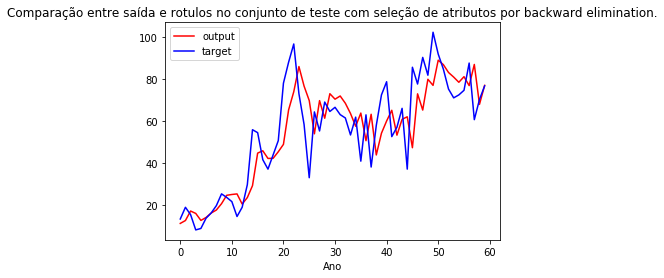

In [24]:
plt.plot(out_test, '-r')
plt.plot(y_test, '-b')
plt.xlabel('Ano')
plt.legend(('output', 'target'))
plt.title('Comparação entre saída e rotulos no conjunto de teste com seleção de atributos por backward elimination.')
plt.show()

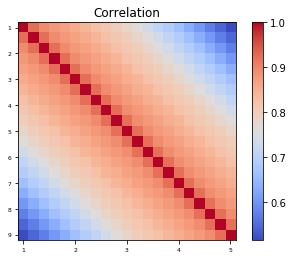

In [25]:
corr = np.corrcoef(np.hstack(( y_train, X_train)).T)
fig = plt.figure()
ax1 = fig.add_subplot(111)
cax = ax1.imshow(corr, interpolation="nearest", cmap='coolwarm')
ax1.grid(False)
plt.title('Correlation')
labels=[e for e in range(21)]
ax1.set_xticklabels(labels,fontsize=6)
ax1.set_yticklabels(labels,fontsize=6)
# Add colorbar, make sure to specify tick locations to match desired ticklabels
fig.colorbar(cax)
plt.show()

In [26]:
corr.shape

(21, 21)

In [27]:
mask = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
W_prime = mmq(Phi_train[:,mask], y_train)
out_train = linreg(W_prime, Phi_train[:,mask])
out_test = linreg(W_prime, Phi_test[:,mask])

In [28]:
print("RMSE do conjunto de treino: {}\nRMSE do conjunto de teste: {}".format(rmse(out_train, y_train), rmse(out_test, y_test)))

RMSE do conjunto de treino: 15.475717956444973
RMSE do conjunto de teste: 14.131716826130726


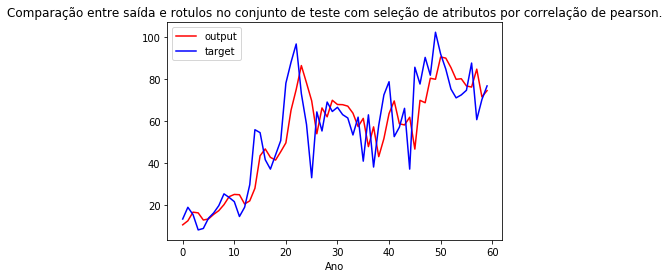

In [29]:
plt.plot(out_test, '-r')
plt.plot(y_test, '-b')
plt.xlabel('Ano')
plt.legend(('output', 'target'))
plt.title('Comparação entre saída e rotulos no conjunto de teste com seleção de atributos por correlação de pearson.')
plt.show()

In [30]:
Phi_train

array([[  1. , 103. ,  85.4, ...,  70. ,  62.6,  58. ],
       [  1. ,  91.2, 103. , ...,  55.7,  70. ,  62.6],
       [  1. ,  65.7,  91.2, ...,  85. ,  55.7,  70. ],
       ...,
       [  1. ,   4.3,   0. , ...,   2.9,   9.3,   2.1],
       [  1. ,   4.8,   4.3, ...,   3.2,   2.9,   9.3],
       [  1. ,   4.1,   4.8, ...,   3.4,   3.2,   2.9]])

In [31]:
Phi_train[np.random.randint(Phi_train.shape[0], size=2), :]

array([[ 1. ,  4.8,  1.6,  5.1,  0.6,  5.3,  6.7,  0.2,  2.1,  6.5, 20.6,
         9.4,  6.4,  2.4,  4.3,  6.7,  8.5,  0.8,  6.7, 10.7,  2.1],
       [ 1. , 18.7, 10. , 19. , 13. , 17.4, 15.3, 24.6, 31.2, 30. , 43.1,
        14.6, 25.8, 35.6, 34.4, 32.1, 24.9, 21.9, 28.8, 36.8, 38.2]])

In [32]:
Phi_train

array([[  1. , 103. ,  85.4, ...,  70. ,  62.6,  58. ],
       [  1. ,  91.2, 103. , ...,  55.7,  70. ,  62.6],
       [  1. ,  65.7,  91.2, ...,  85. ,  55.7,  70. ],
       ...,
       [  1. ,   4.3,   0. , ...,   2.9,   9.3,   2.1],
       [  1. ,   4.8,   4.3, ...,   3.2,   2.9,   9.3],
       [  1. ,   4.1,   4.8, ...,   3.4,   3.2,   2.9]])